Cluster Airline Passenger Satisfaction to see what factors lead to customer satisfaction for an Airline.

In [ ]:
import pandas as pd
import numpy as np

import sklearn as sk
from sklearn.cluster import KMeans

import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df_test = pd.read_csv("test.csv")
df_train = pd.read_csv("train.csv")

In [ ]:
df_train.head(10)

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied
5,5,111157,Female,Loyal Customer,26,Personal Travel,Eco,1180,3,4,...,1,3,4,4,4,4,1,0,0.0,neutral or dissatisfied
6,6,82113,Male,Loyal Customer,47,Personal Travel,Eco,1276,2,4,...,2,3,3,4,3,5,2,9,23.0,neutral or dissatisfied
7,7,96462,Female,Loyal Customer,52,Business travel,Business,2035,4,3,...,5,5,5,5,4,5,4,4,0.0,satisfied
8,8,79485,Female,Loyal Customer,41,Business travel,Business,853,1,2,...,1,1,2,1,4,1,2,0,0.0,neutral or dissatisfied
9,9,65725,Male,disloyal Customer,20,Business travel,Eco,1061,3,3,...,2,2,3,4,4,3,2,0,0.0,neutral or dissatisfied


In [ ]:
df_test.head(10)

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,19556,Female,Loyal Customer,52,Business travel,Eco,160,5,4,...,5,5,5,5,2,5,5,50,44.0,satisfied
1,1,90035,Female,Loyal Customer,36,Business travel,Business,2863,1,1,...,4,4,4,4,3,4,5,0,0.0,satisfied
2,2,12360,Male,disloyal Customer,20,Business travel,Eco,192,2,0,...,2,4,1,3,2,2,2,0,0.0,neutral or dissatisfied
3,3,77959,Male,Loyal Customer,44,Business travel,Business,3377,0,0,...,1,1,1,1,3,1,4,0,6.0,satisfied
4,4,36875,Female,Loyal Customer,49,Business travel,Eco,1182,2,3,...,2,2,2,2,4,2,4,0,20.0,satisfied
5,5,39177,Male,Loyal Customer,16,Business travel,Eco,311,3,3,...,5,4,3,1,1,2,5,0,0.0,satisfied
6,6,79433,Female,Loyal Customer,77,Business travel,Business,3987,5,5,...,5,5,5,5,4,5,3,0,0.0,satisfied
7,7,97286,Female,Loyal Customer,43,Business travel,Business,2556,2,2,...,4,4,4,4,5,4,3,77,65.0,satisfied
8,8,27508,Male,Loyal Customer,47,Business travel,Eco,556,5,2,...,5,2,2,5,3,3,5,1,0.0,satisfied
9,9,62482,Female,Loyal Customer,46,Business travel,Business,1744,2,2,...,4,4,4,4,5,4,4,28,14.0,satisfied


In [ ]:
df_train.shape

(103904, 25)

In [ ]:
df_test.shape

(25976, 25)

In [ ]:
df_train.dtypes

Unnamed: 0                             int64
id                                     int64
Gender                                object
Customer Type                         object
Age                                    int64
Type of Travel                        object
Class                                 object
Flight Distance                        int64
Inflight wifi service                  int64
Departure/Arrival time convenient      int64
Ease of Online booking                 int64
Gate location                          int64
Food and drink                         int64
Online boarding                        int64
Seat comfort                           int64
Inflight entertainment                 int64
On-board service                       int64
Leg room service                       int64
Baggage handling                       int64
Checkin service                        int64
Inflight service                       int64
Cleanliness                            int64
Departure 

In [ ]:
df_train['Inflight service'].value_counts()

4    37945
5    27116
3    20299
2    11457
1     7084
0        3
Name: Inflight service, dtype: int64

In [ ]:
columns_with_miss = df_train.isna().sum()
columns_with_miss = columns_with_miss[columns_with_miss!=0]
columns_with_miss

Arrival Delay in Minutes    310
dtype: int64

In [ ]:
columns_with_miss = df_test.isna().sum()
columns_with_miss = columns_with_miss[columns_with_miss!=0]
columns_with_miss

Arrival Delay in Minutes    83
dtype: int64

In [ ]:
df_train.describe()

,Unnamed: 0,id,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
count,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103594.000000
mean,51951.500000,64924.210502,39.379706,1189.448375,2.729683,3.060296,2.756901,2.976883,3.202129,3.250375,3.439396,3.358158,3.382363,3.351055,3.631833,3.304290,3.640428,3.286351,14.815618,15.178678
std,29994.645522,37463.812252,15.114964,997.147281,1.327829,1.525075,1.398929,1.277621,1.329533,1.349509,1.319088,1.332991,1.288354,1.315605,1.180903,1.265396,1.175663,1.312273,38.230901,38.698682
min,0.000000,1.000000,7.000000,31.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,25975.750000,32533.750000,27.000000,414.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,3.000000,3.000000,2.000000,0.000000,0.000000
50%,51951.500000,64856.500000,40.000000,843.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000,0.000000,0.000000
75%,77927.250000,97368.250000,51.000000,1743.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,4.000000,5.000000,4.000000,5.000000,4.000000,12.000000,13.000000
max,103903.000000,129880.000000,85.000000,4983.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1592.000000,1584.000000


In [ ]:
df_test.describe()

,Unnamed: 0,id,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
count,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.00000,25893.000000
mean,12987.500000,65005.657992,39.620958,1193.788459,2.724746,3.046812,2.756775,2.977094,3.215353,3.261665,3.449222,3.357753,3.385664,3.350169,3.633238,3.314175,3.649253,3.286226,14.30609,14.740857
std,7498.769632,37611.526647,15.135685,998.683999,1.335384,1.533371,1.412951,1.282133,1.331506,1.355536,1.320090,1.338299,1.282088,1.318862,1.176525,1.269332,1.180681,1.319330,37.42316,37.517539
min,0.000000,17.000000,7.000000,31.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.00000,0.000000
25%,6493.750000,32170.500000,27.000000,414.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,3.000000,3.000000,2.000000,0.00000,0.000000
50%,12987.500000,65319.500000,40.000000,849.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000,0.00000,0.000000
75%,19481.250000,97584.250000,51.000000,1744.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,4.000000,5.000000,4.000000,5.000000,4.000000,12.00000,13.000000
max,25975.000000,129877.000000,85.000000,4983.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1128.00000,1115.000000


* There is no outliers : all the variables for satistfaction are between 0 and 5 (as they should) and the other variables like Age.. seems logical.
* I will just deal with the missing values (replace the missing values with the mode)

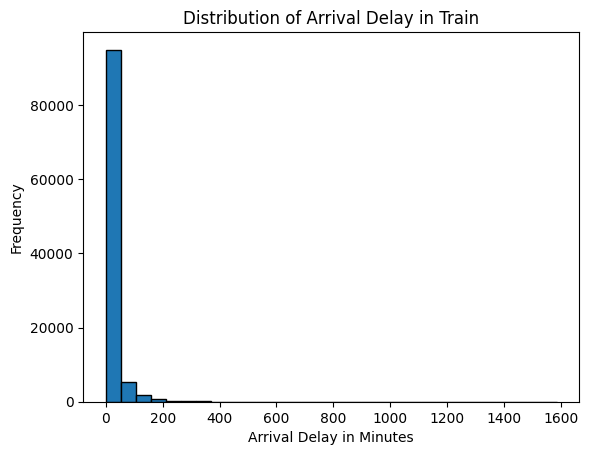

In [ ]:
plt.hist(df_train['Arrival Delay in Minutes'], bins=30, edgecolor='black')
plt.xlabel('Arrival Delay in Minutes')
plt.ylabel('Frequency')
plt.title('Distribution of Arrival Delay in Train')
plt.show()

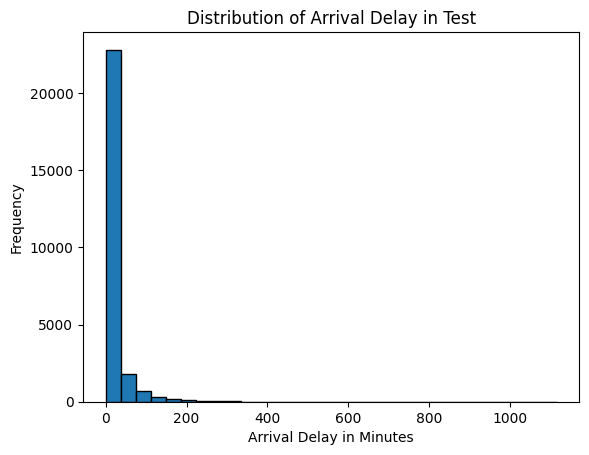

In [ ]:
plt.hist(df_test['Arrival Delay in Minutes'], bins=30, edgecolor='black')
plt.xlabel('Arrival Delay in Minutes')
plt.ylabel('Frequency')
plt.title('Distribution of Arrival Delay in Test')
plt.show()

In [ ]:
df_train['Arrival Delay in Minutes'].value_counts()

0.0      58159
1.0       2211
2.0       2064
3.0       1952
4.0       1907
         ...  
458.0        1
729.0        1
382.0        1
459.0        1
369.0        1
Name: Arrival Delay in Minutes, Length: 455, dtype: int64

In [ ]:
df_test['Arrival Delay in Minutes'].value_counts()

0.0      14594
1.0        536
2.0        523
3.0        490
4.0        466
         ...  
307.0        1
285.0        1
347.0        1
795.0        1
288.0        1
Name: Arrival Delay in Minutes, Length: 320, dtype: int64

In [ ]:
df_test['Arrival Delay in Minutes'].fillna(0, inplace=True)
df_train['Arrival Delay in Minutes'].fillna(0, inplace=True)

* Now its time to figure out which columns to drop

In [ ]:
df_train.dtypes

Unnamed: 0                             int64
id                                     int64
Gender                                object
Customer Type                         object
Age                                    int64
Type of Travel                        object
Class                                 object
Flight Distance                        int64
Inflight wifi service                  int64
Departure/Arrival time convenient      int64
Ease of Online booking                 int64
Gate location                          int64
Food and drink                         int64
Online boarding                        int64
Seat comfort                           int64
Inflight entertainment                 int64
On-board service                       int64
Leg room service                       int64
Baggage handling                       int64
Checkin service                        int64
Inflight service                       int64
Cleanliness                            int64
Departure 

In [ ]:
df_train['satisfaction'].value_counts()

neutral or dissatisfied    58879
satisfied                  45025
Name: satisfaction, dtype: int64

In [ ]:
df_train['Customer Type'].value_counts()

Loyal Customer       84923
disloyal Customer    18981
Name: Customer Type, dtype: int64

In [ ]:
df_train['Type of Travel'].value_counts()

Business travel    71655
Personal Travel    32249
Name: Type of Travel, dtype: int64

In [ ]:
df_train['Class'].value_counts()

Business    49665
Eco         46745
Eco Plus     7494
Name: Class, dtype: int64

In [ ]:
df_train = pd.get_dummies(df_train, columns=["Class"], prefix=["Class"], drop_first=True)
df_test = pd.get_dummies(df_test, columns=["Class"], prefix=["Class"], drop_first=True)

In [ ]:
df_train.head(10)

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,...,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction,Class_Eco,Class_Eco Plus
0,0,70172,Male,Loyal Customer,13,Personal Travel,460,3,4,3,...,3,4,4,5,5,25,18.0,neutral or dissatisfied,0,1
1,1,5047,Male,disloyal Customer,25,Business travel,235,3,2,3,...,5,3,1,4,1,1,6.0,neutral or dissatisfied,0,0
2,2,110028,Female,Loyal Customer,26,Business travel,1142,2,2,2,...,3,4,4,4,5,0,0.0,satisfied,0,0
3,3,24026,Female,Loyal Customer,25,Business travel,562,2,5,5,...,5,3,1,4,2,11,9.0,neutral or dissatisfied,0,0
4,4,119299,Male,Loyal Customer,61,Business travel,214,3,3,3,...,4,4,3,3,3,0,0.0,satisfied,0,0
5,5,111157,Female,Loyal Customer,26,Personal Travel,1180,3,4,2,...,4,4,4,4,1,0,0.0,neutral or dissatisfied,1,0
6,6,82113,Male,Loyal Customer,47,Personal Travel,1276,2,4,2,...,3,4,3,5,2,9,23.0,neutral or dissatisfied,1,0
7,7,96462,Female,Loyal Customer,52,Business travel,2035,4,3,4,...,5,5,4,5,4,4,0.0,satisfied,0,0
8,8,79485,Female,Loyal Customer,41,Business travel,853,1,2,2,...,2,1,4,1,2,0,0.0,neutral or dissatisfied,0,0
9,9,65725,Male,disloyal Customer,20,Business travel,1061,3,3,3,...,3,4,4,3,2,0,0.0,neutral or dissatisfied,1,0


# **Dropped columns :**
* Unnamed: 0 : for numbering only.                        
* id : just a random number for each passenger.  
* Gender, Customer Type, Type of Travel : this things doesnt influence passenger satisfaction.
* Departure Delay in Minutes and Arrival Delay in Minutes : this is same as Departure/Arrival time convenient so drop it.
* satisfaction : this is what we trying to cluster

# **Columns to keep :**
* Age : older or younger passenger might need specific things for their satistfaction so its important feature.     
* Flight Distance : long distances might be boring and needs extra care for passenger satisfaction.
* Class : is an important feature to keep bcz the feedback from passengers is relevant to the class (3 for Seat comfort in eco class is a very good rating while in business class might be really bad) so i did the encoding.    

This are important features to keep bcz its direct feedback from passengers :

* Inflight wifi service,                
* Departure/Arrival time convenient,      
* Ease of Online booking,                
* Gate location,                          
* Food and drink,                         
* Online boarding,                        
* Seat comfort,                           
* Inflight entertainment,                 
* On-board service,                       
* Leg room service,                       
* Baggage handling,                       
* Checkin service,                        
* Inflight service,                       
* Cleanliness,     


                        


In [ ]:
df_train.dtypes

Unnamed: 0                             int64
id                                     int64
Gender                                object
Customer Type                         object
Age                                    int64
Type of Travel                        object
Flight Distance                        int64
Inflight wifi service                  int64
Departure/Arrival time convenient      int64
Ease of Online booking                 int64
Gate location                          int64
Food and drink                         int64
Online boarding                        int64
Seat comfort                           int64
Inflight entertainment                 int64
On-board service                       int64
Leg room service                       int64
Baggage handling                       int64
Checkin service                        int64
Inflight service                       int64
Cleanliness                            int64
Departure Delay in Minutes             int64
Arrival De

In [ ]:
selected_columns = ["Age",
"Flight Distance",
"Inflight wifi service",
"Departure/Arrival time convenient",
"Ease of Online booking",
"Gate location",
"Food and drink",
"Online boarding",
"Seat comfort",
"Inflight entertainment",
"On-board service",
"Leg room service",
"Baggage handling",
"Checkin service",
"Inflight service",
"Cleanliness",
"Class_Eco",
"Class_Eco Plus",]

X_train = df_train[selected_columns]
X_test = df_test[selected_columns]

kmeans = KMeans(n_clusters=2, init="k-means++", random_state=10, n_init="auto")
kmeans.fit(X_train)

KMeans(n_clusters=2, n_init='auto', random_state=10)

In [ ]:
loss_train, loss_test = [], []

max_cluster = 10

for k in np.arange(max_cluster)+1:

    kmeans_model = KMeans(n_clusters=k, random_state=25)
    kmeans_model.fit(X_train)

    loss_train_iter = kmeans_model.inertia_
    loss_train.append(loss_train_iter)

    kmeans_model = KMeans(n_clusters=k, random_state=25)
    kmeans_model.fit(X_test)

    loss_test_iter = kmeans_model.inertia_
    loss_test.append(loss_test_iter)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

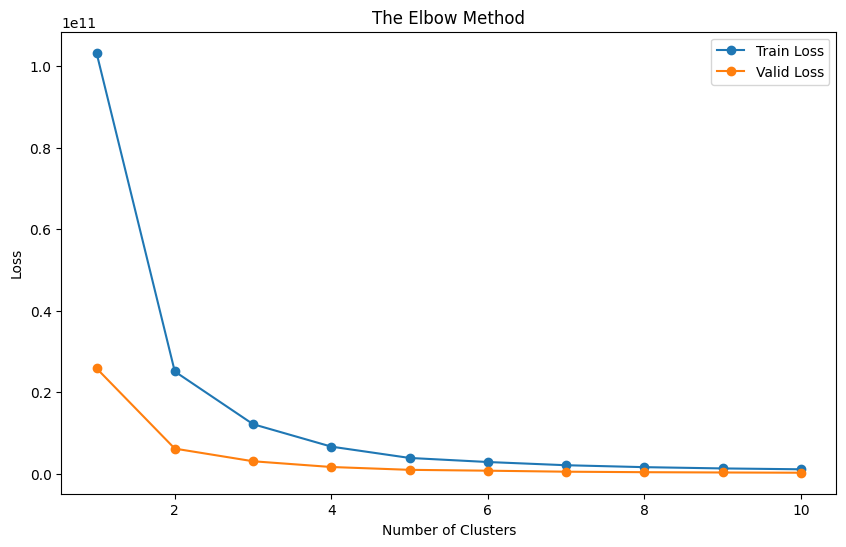

In [ ]:
plt.figure(figsize=(10, 6))

plt.plot(np.arange(max_cluster) + 1, loss_train, marker='o', label='Train Loss')
plt.plot(np.arange(max_cluster) + 1, loss_valid, marker='o', label='Valid Loss')

plt.xlabel('Number of Clusters')
plt.ylabel('Loss')
plt.title('The Elbow Method')

plt.legend()
plt.show()

2 is the optimal number of clusters.